In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, CSV
include("zz_structures_DuLuSuSe.jl")
include("mbsampler.jl")

get_clustering (generic function with 1 method)

In [2]:
m = CSV.read("pd_speech_features.csv", header=false);

In [3]:
X = zeros(size(m,1)-2,size(m,2)-2)
for i in 3:size(m,1) 
    for j in 2:size(m,2)-1 
        X[i-2,j-1] = parse(m[i,j])
    end
end
mu, sd = vec(mean(X[:,2:end],1)), vec(std(X[:,2:end],1))
X_normalised = zeros(size(X))
for i in 1:size(X,1) 
    X_normalised[i,2:end] = (X[i,2:end]-mu)./sd
end
X_normalised = X_normalised';
y = vec([parse(m[i,end]) for i in 3:size(m,1)]);

In [4]:
d, Nobs = size(X_normalised)
σ02 = 1;

In [12]:
prior = SS_prior(d, σ02)
my_ll = ll_logistic(X_normalised,y)
my_model = model(my_ll, prior);

In [13]:
ξ0 = zeros(d)
epsilon = 1.5e-2
L = 20
T = 1000

xi_samples, hyper_samples, acc = GibbsHMC(my_model, ξ0, epsilon, L, T);

10 percent steps in 92.3 min; HMC acceptance = 86 percent 
20 percent steps in 183.6 min; HMC acceptance = 88 percent 
30 percent steps in 274.8 min; HMC acceptance = 89 percent 
40 percent steps in 364.8 min; HMC acceptance = 90 percent 
50 percent steps in 441.2 min; HMC acceptance = 90 percent 
60 percent steps in 486.2 min; HMC acceptance = 91 percent 
70 percent steps in 531.3 min; HMC acceptance = 92 percent 
80 percent steps in 576.4 min; HMC acceptance = 92 percent 
90 percent steps in 621.6 min; HMC acceptance = 92 percent 
100 percent steps in 666.8 min; HMC acceptance = 92 percent 


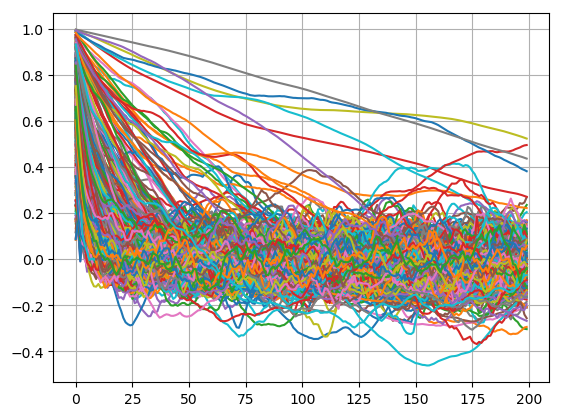

In [14]:
for i in 1:size(xi_samples,1) 
    plot(acf(xi_samples[i,:], 200))
end
grid(true)

In [22]:
a = size(xi_samples,2)./[abs.(sum(acf(xi_samples[i,:],200))) for i in 1:size(xi_samples,1)];
mean(a)

1784.3897188238466

In [23]:
Nobs*L*T/(5*10^7)

0.3024